In [87]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [ ]:
def get_title(env: str, alg: str) -> str:
  alg_title = alg.replace('_', ' ').upper()
  env_title = env.upper()
  title = f'{env_title} {alg_title}'
  return title

In [89]:
def get_results_dir(env: str, alg: str) -> Path:
  root_dir = Path.cwd().parent
  results_dir = root_dir / "results" / env / alg 
  return results_dir

In [90]:
def read_history(env: str, alg: str) -> pd.DataFrame:
  results_dir = get_results_dir(env, alg)
  history_path = results_dir / "history.csv"
  history_df = pd.read_csv(history_path)
  return history_df

In [91]:
def read_analysis_results(env: str, alg: str):
  results_dir = get_results_dir(env, alg)
  analysis_results_path = results_dir / "analysis_results.json"
  with open(analysis_results_path, "r", encoding="utf-8") as f:
    analysis_results = json.load(f)
  return analysis_results

In [128]:
def render_reward_history(env: str, alg: str, title: str) -> None:
  history_df = read_history(env, alg)
  history_df['reward_ma'] = history_df['reward'].rolling(window=50).mean()
  plt.figure(figsize=(8, 4))
  plt.plot(history_df['reward'], alpha=0.5, label='Нагорода')
  plt.plot(history_df['reward_ma'], color='red', linewidth=2, label='Рухоме середнє')
  plt.xlabel('Ітерації')
  plt.ylabel('Нагорода')
  plt.legend()
  chart_title = get_title(env, alg)
  if title:
    chart_title = title
  plt.title(title)
  plt.grid(True)
  plt.show()

In [125]:
def print_results(algs) -> None:
  rows = []
  for opt in algs:
    env = opt['env']
    alg = opt['alg']
    name = opt['name']
    results = read_analysis_results(env, alg)
    results['name'] = name
    rows.append(results)

  return pd.DataFrame(rows).head()

In [ ]:
def compare_diagram(algs) -> None:
  colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
  data = []
  for opt in algs:
    env = opt['env']
    alg = opt['alg']
    results = read_analysis_results(env, alg)
    results['name'] = opt['name']
    data.append(results)

  df = pd.DataFrame(data)
  print(data)

  fig, axes = plt.subplots(2, 2, figsize=(10, 8))
  ax1, ax2, ax3, ax4 = axes.ravel()

  axes[0, 0].bar(df['name'], df['rewards_sum'], color=colors[:len(df)])
  axes[0, 0].set_ylabel('Сумарна нагорода')

  axes[0, 1].bar(df['name'], df['highest_reward'], color=colors[:len(df)])
  axes[0, 1].set_ylabel('Максимальне значення')

  axes[1, 0].bar(df['name'], df['convergence_iteration'], color=colors[:len(df)])
  axes[1, 0].set_ylabel('Швидкість збіжності')

  axes[1, 1].bar(df['name'], df['high_rewards'], color=colors[:len(df)])
  axes[1, 1].set_ylabel('Кількість високих нагород')

  plt.tight_layout() 
  plt.show()
  

[{'algorithm': 'mab', 'environment': 'hardware', 'algorithm_configs': {'epsilon': 0.9}, 'time_diff': 9850, 'high_rewards': 427, 'convergence_iteration': 49, 'rewards_sum': 291.8366, 'highest_reward': 0.4817, 'name': 'MAB'}, {'algorithm': 'mab_decay', 'environment': 'hardware', 'algorithm_configs': {'epsilon': 0.01}, 'time_diff': 5293, 'high_rewards': 859, 'convergence_iteration': 56, 'rewards_sum': 368.3923, 'highest_reward': 0.4196, 'name': 'MABD'}, {'algorithm': 'mab_exponential', 'environment': 'hardware', 'algorithm_configs': {'epsilon': 0.01, 'alpha': 0.3}, 'time_diff': 1950, 'high_rewards': 816, 'convergence_iteration': 236, 'rewards_sum': 370.9828, 'highest_reward': 0.4193, 'name': 'MABE'}, {'algorithm': 'ucb', 'environment': 'hardware', 'algorithm_configs': {'epsilon': 0.01, 'alpha': 0.3, 'exploration_factor': 0.2}, 'time_diff': 3084, 'high_rewards': 237, 'convergence_iteration': 265, 'rewards_sum': 326.129, 'highest_reward': 0.4463, 'name': 'UCB-MAB'}, {'algorithm': 'gradient'

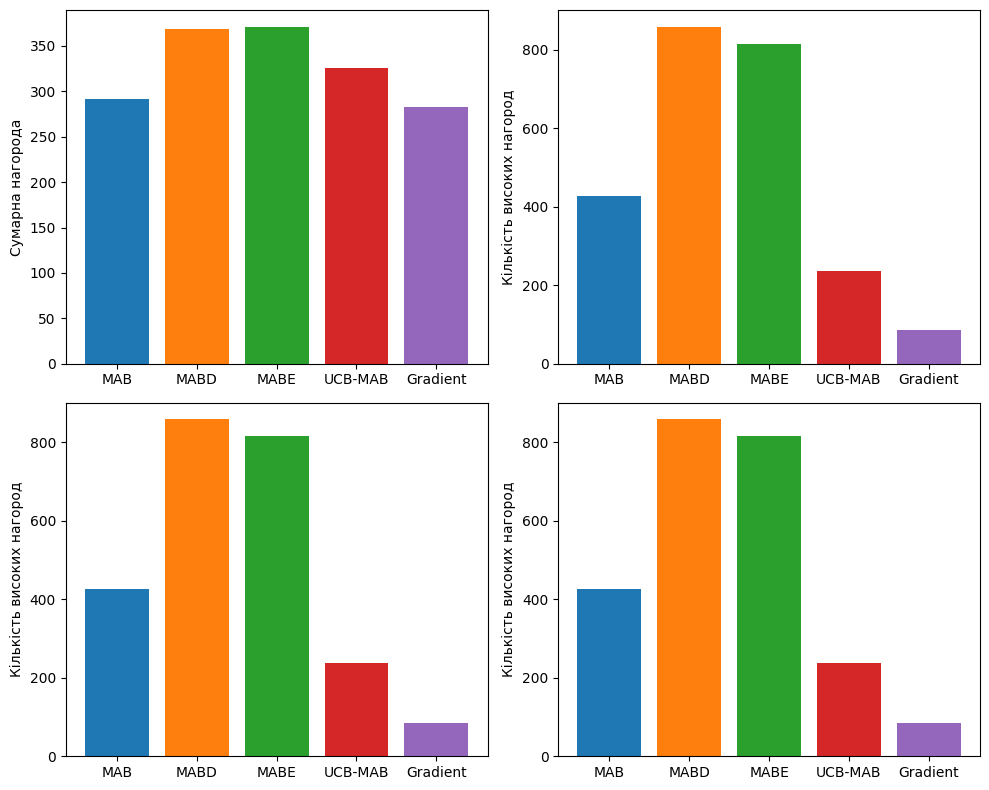

In [149]:
to_compare = [
  {
    'alg': 'mab',
    'env': 'hardware',
    'name': 'MAB'
  },
  {
    'alg': 'mab_decay',
    'env': 'hardware',
    'name': 'MABD'
  },
  {
    'alg': 'mab_exponential',
    'env': 'hardware',
    'name': 'MABE'
  },
  {
    'alg': 'ucb',
    'env': 'hardware',
    'name': 'UCB-MAB'
  },
  {
    'alg': 'gradient',
    'env': 'hardware',
    'name': 'Gradient'
  }
]

compare_diagram(to_compare)

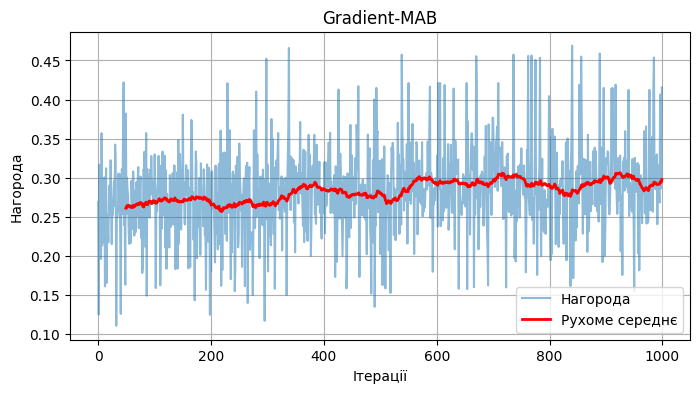

In [138]:
render_reward_history('hardware', 'gradient', 'Gradient-MAB')

In [126]:
to_compare = [
  {
    'alg': 'mab',
    'env': 'hardware',
    'name': 'MAB'
  },
  {
    'alg': 'mab_decay',
    'env': 'hardware',
    'name': 'MABD'
  },
  {
    'alg': 'mab_exponential',
    'env': 'hardware',
    'name': 'MABE'
  },
  {
    'alg': 'ucb',
    'env': 'hardware',
    'name': 'UCB-MAB'
  },
  {
    'alg': 'gradient',
    'env': 'hardware',
    'name': 'Gradient-MAB'
  }
]
print_results(to_compare)

,algorithm,environment,algorithm_configs,time_diff,high_rewards,convergence_iteration,rewards_sum,highest_reward,name
0,mab,hardware,{'epsilon': 0.9},9850,427,49.0,291.8366,0.4817,MAB
1,mab_decay,hardware,{'epsilon': 0.01},5293,859,56.0,368.3923,0.4196,MABD
2,mab_exponential,hardware,"{'epsilon': 0.01, 'alpha': 0.3}",1950,816,236.0,370.9828,0.4193,MABE
3,ucb,hardware,"{'epsilon': 0.01, 'alpha': 0.3, 'exploration_f...",3084,237,265.0,326.1290,0.4463,UCB-MAB
4,gradient,hardware,"{'epsilon': 0.01, 'alpha': 0.3}",4007,85,NaN,283.2541,0.4688,Gradient-MAB
